<a href="https://colab.research.google.com/github/lta36/RL/blob/main/Tensorflow_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook adopted from Alvin Pan (Former TA)

### Tensorflow NeuralNet Example

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X = tf.random.normal(
    shape=[10,10], dtype=tf.dtypes.float32, seed=None, name=None
)
X

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[-0.43766966,  0.6514213 , -1.3674514 , -0.7629268 ,  0.55585885,
         0.10559212,  1.3659743 ,  2.166216  ,  0.52242136,  1.8874416 ],
       [-0.21419924, -0.83834076, -0.32541966,  0.4629239 ,  1.6094146 ,
         0.1570129 , -0.1886758 ,  1.0333475 , -1.745099  ,  0.23259036],
       [ 0.6833569 ,  0.7563238 ,  0.77150023,  0.85515404, -2.234364  ,
        -1.2494018 ,  0.1950037 , -1.2681196 ,  0.71863985, -1.0305818 ],
       [ 0.8356834 , -1.1745186 ,  0.07862271,  1.5512508 ,  1.6012942 ,
        -0.45833045, -1.5643427 , -0.670515  , -0.44134647, -1.2436055 ],
       [-0.35463282,  0.29603982,  0.08184888,  0.73844486,  1.093459  ,
         0.47180524,  0.61311287,  0.51183605, -0.4405215 , -0.14844316],
       [-1.7971636 , -0.37309992,  0.9830137 , -1.5698546 , -1.979104  ,
         1.9405367 ,  0.03719208, -0.3496666 , -0.534703  ,  0.6582037 ],
       [ 1.218381  ,  0.22564396,  0.06985486,  0.16731024, -0.45153

In [ ]:
Y = np.eye(2)[np.random.choice(2,10)]
Y = tf.convert_to_tensor(Y, dtype='float32')
Y
#Y.numpy()

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)>

In [ ]:
model1 = tf.keras.models.Sequential(
[
 tf.keras.layers.Dense(5, activation='tanh'),
 tf.keras.layers.Dense(5, activation='relu'),
 tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
'''
model1.compile(
    optimizer='adam',
    loss='mse',
    metrics=['accuracy'],
)
'''

model1.compile(
    optimizer='adam',
    loss=tf.keras.losses.MSE,
    metrics=['accuracy'],
)

In [ ]:
hist = model1.fit(X, Y, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 918ms/step - loss: 0.1649 - accuracy: 0.8000
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 0.1637 - accuracy: 0.8000
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 0.1625 - accuracy: 0.8000
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 0.1613 - accuracy: 0.8000
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 0.1601 - accuracy: 0.8000
Epoch 6/10
1/1 [==============================] - 0s 10ms/step - loss: 0.1589 - accuracy: 0.8000
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.1577 - accuracy: 0.8000
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.1565 - accuracy: 0.8000
Epoch 9/10
1/1 [==============================] - 0s 8ms/step - loss: 0.1553 - accuracy: 0.8000
Epoch 10/10
1/1 [==============================] - 0s 5ms/step - loss: 0.1541 - accuracy: 0.8000


In [ ]:
loss = hist.history['loss'][0]
loss

0.1649094521999359

In [ ]:
acc = hist.history['accuracy'][-1]
acc

0.800000011920929

In [ ]:
model2 = tf.keras.models.Sequential(
[
 tf.keras.layers.Dense(5, activation='relu'),
 tf.keras.layers.Dense(5, activation='relu'),
 tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
op = tf.keras.optimizers.Adam(learning_rate=1e-3)

In [ ]:
losses = []
for _ in range(200):
  with tf.GradientTape() as tape:
    yhat = model2(X)
    loss = tf.reduce_mean((Y - yhat)**2)
  gradients = tape.gradient(loss, model2.trainable_weights)
  op.apply_gradients(zip(gradients, model2.trainable_weights))
  losses.append(loss.numpy())

Text(0, 0.5, 'loss')

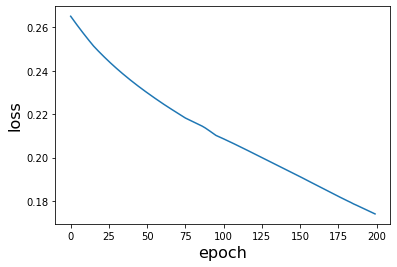

In [ ]:
plt.plot(range(200),losses)
plt.xlabel('epoch', fontsize=16)
plt.ylabel('loss', fontsize=16)

In [ ]:
Z = tf.random.uniform(
    shape=[10,2], dtype=tf.dtypes.float32, seed=None)

#### Be careful with syntax!

In [ ]:
model1(X)

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[0.19189939, 0.80810064],
       [0.30586687, 0.6941332 ],
       [0.36222047, 0.63777953],
       [0.47159436, 0.52840567],
       [0.20601808, 0.7939819 ],
       [0.34950444, 0.6504956 ],
       [0.19433694, 0.80566305],
       [0.29255536, 0.7074446 ],
       [0.5179685 , 0.4820315 ],
       [0.23033275, 0.76966727]], dtype=float32)>

In [ ]:
model1(X.numpy())

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[0.19189939, 0.80810064],
       [0.30586687, 0.6941332 ],
       [0.36222047, 0.63777953],
       [0.47159436, 0.52840567],
       [0.20601808, 0.7939819 ],
       [0.34950444, 0.6504956 ],
       [0.19433694, 0.80566305],
       [0.29255536, 0.7074446 ],
       [0.5179685 , 0.4820315 ],
       [0.23033275, 0.76966727]], dtype=float32)>

In [ ]:
model1(X.numpy().tolist())

ValueError: ignored

#### Custimize your own NN!

In [ ]:
class NeuralNet(tf.keras.Model):

  def __init__(self, output_size, layers=[5,5], use_softmax=True):
    super().__init__()
    initializer = tf.keras.initializers.VarianceScaling(scale=1.0, mode="fan_avg", distribution="normal", seed=None)

    self.dense1 = tf.keras.layers.Dense(layers[0], activation=tf.nn.relu, kernel_initializer=initializer)
    self.dense2 = tf.keras.layers.Dense(layers[1], activation=tf.nn.relu, kernel_initializer=initializer)

    activation = tf.nn.softmax if use_softmax else tf.identity
    self.output_layer = tf.keras.layers.Dense(output_size, activation=activation, kernel_initializer=initializer)

  def call(self, inputs):
    x = self.dense1(inputs)
    x = self.dense2(x)
    x = self.output_layer(x)
    return x
  # add more (useful) helper functions if you like
  def half_forward(self, inputs):
    x = self.dense1(inputs)
    return x

In [ ]:
model3 = NeuralNet(2)

In [ ]:
model3(X)

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[0.45828846, 0.54171157],
       [0.4788609 , 0.521139  ],
       [0.43221635, 0.56778365],
       [0.47882813, 0.5211719 ],
       [0.42057157, 0.57942843],
       [0.5       , 0.5       ],
       [0.41304505, 0.586955  ],
       [0.4903891 , 0.5096109 ],
       [0.47090253, 0.5290975 ],
       [0.5       , 0.5       ]], dtype=float32)>

In [ ]:
model3.half_forward(X)

<tf.Tensor: shape=(10, 5), dtype=float32, numpy=
array([[0.        , 0.        , 0.7999295 , 0.01888496, 0.        ],
       [0.22100699, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.3816447 , 0.        , 1.5543183 , 1.6892813 ],
       [0.        , 0.        , 0.41848102, 0.        , 0.        ],
       [0.        , 0.        , 1.5111339 , 0.99293834, 0.6459769 ],
       [0.        , 0.9052312 , 0.        , 0.02676344, 1.1932855 ],
       [0.11835292, 0.99755573, 0.        , 0.840219  , 0.10977566],
       [1.0258327 , 0.6245448 , 0.2808645 , 0.49311754, 0.3932676 ],
       [0.        , 0.        , 0.17448562, 0.        , 0.631918  ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]],
      dtype=float32)>



```
`# This is formatted as code`
```

### Supervised Learning -- Classification

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
plt.hist(x_train.flatten() / 255.)

In [ ]:
x_train.shape

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train, x_test = x_train / 255., x_test / 255.

In [ ]:
x_train.shape

In [ ]:
model = tf.keras.models.Sequential(
[
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dense(10, activation=None)
])

In [ ]:
tf.nn.softmax(model(x_test))

In [ ]:
tf.reduce_sum(tf.nn.softmax(model(x_test)), axis=1)

In [ ]:
y_test[:3]

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
loss_fn(y_test, model(x_test))

In [ ]:
np.log(10)

In [ ]:
model.compile(
    optimizer='adam',
    loss=loss_fn,
    metrics=['accuracy'],
)

In [ ]:
model.trainable_variables

In [ ]:
history = model.fit(x_train, y_train, epochs=5,
          validation_data=(x_test, y_test))

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.ylabel('accuracy', fontsize=16)
plt.xlabel('steps', fontsize=16)
plt.legend(fontsize=16)
plt.grid()

In [ ]:
# failure = 6744
index = np.random.choice(len(x_test))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(x_test[index])
plt.subplot(122)
probs = tf.nn.softmax(model(x_test[index][None]))[0]
plt.plot(probs, '-o')
plt.xticks(range(10))
plt.grid()
plt.show()

### Supervised Learning -- Regression

In [ ]:
num_samples = 40
x = np.random.uniform(-5, 5, (num_samples, 1))
y = np.sin(x)
x_train, x_test = x[:num_samples // 2], x[num_samples // 2:]
y_train, y_test = y[:num_samples // 2], y[num_samples // 2:]
plt.plot(x, y, 'o')

In [ ]:
tf.keras.optimizers.Adam().learning_rate

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(1, activation=None),
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
    loss='mse',
)

In [ ]:
history = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test),
                    batch_size=256,
)

In [ ]:
help(tf.data.Dataset)

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.grid()
plt.legend(fontsize=16)
plt.xlabel('steps', fontsize=16)
plt.ylabel('loss', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
x = np.linspace(-10, 10, 100)
y_hat = model(x)
plt.plot(x_train, y_train, 'o', label='training data')
plt.plot(x, y_hat, label='prediction')
plt.plot(x, np.sin(x), label='y=sin(x')
plt.legend()
plt.show()

### Low-level operations
$$X \beta = y$$

In [ ]:
X = np.random.normal(size=(100, 2))
y = X @ np.array([1, 2])

In [ ]:
beta = tf.Variable(np.zeros(2))
y_hat = tf.linalg.matvec(X, beta)

In [ ]:
y_hat

In [ ]:
loss = tf.reduce_mean((y - y_hat)**2)

In [ ]:
beta2 = tf.Variable(0,)
history = []
for _ in range(20):
  with tf.GradientTape() as tape:
    tape.watch([beta])
    y_hat = tf.linalg.matvec(X, beta)
    loss = tf.reduce_mean((y - y_hat)**2)

  learning_rate = 1e-1
  beta = beta - learning_rate * tape.gradient(loss, beta)
  history.append(loss.numpy())

In [ ]:
plt.plot(history)

In [ ]:
beta

### Adversarial Example
$$L(f_\theta(x), y)$$

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5,
          validation_data=(x_test, y_test))

In [ ]:
x_adv = tf.Variable(x_test[0])
y_adv = y_test[0]
plt.imshow(x_adv.numpy())
plt.show()

In [ ]:
x_adv.shape, x_adv[None].shape

In [ ]:
tf.expand_dims(x_adv, 0).shape

In [ ]:
x_adv = tf.Variable(x_test[0]) # shape = (28, 28)
learning_rate = 1
max_norm = 1e-1

x_adv_history = []
p_correct_history = []
for _ in range(15):
  with tf.GradientTape() as tape:
    tape.watch(x_adv)
    y_hat = model(x_adv[None])
    loss = loss_fn([y_adv], y_hat)
  grad = tape.gradient(loss, x_adv)
  grad = (max_norm / tf.norm(grad)) * grad
  x_adv = tf.clip_by_value(x_adv + learning_rate * grad, 0, 1)
  x_adv_history.append(x_adv.numpy())
  p_correct_history.append(tf.nn.softmax(y_hat)[0, y_adv])

In [ ]:
plt.plot(p_correct_history)

In [ ]:
plt.imshow(x_adv)

In [ ]:
plt.figure(figsize=(12, 9))
for index, (x, p_correct) in enumerate(zip(x_adv_history, p_correct_history)):
  plt.subplot(3, 5, index + 1)
  plt.title('p(y) = %.2f' % p_correct, fontsize=16)
  plt.imshow(x)
  plt.axis('off')
plt.show()

In [ ]:
plt.plot(tf.nn.softmax(model(x_adv[None]))[0])